In [1]:
import math
import os
import scipy
from scipy.optimize import lsq_linear
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, halfnorm
import random
from scipy.io import loadmat
import random
import pickle
import sys
sys.path.append(r"c:\Users\katie\OneDrive\Documents\GitHub\trial")
import PCA_Regress as pcar

In [2]:
base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_neu.pkl', "rb") as input_file:
    J_pickle = pickle.load(input_file)
del input_file

file_path = os.path.join(base_path, 'N_neu.pkl')
with open(file_path, "rb") as input_file:
    N_pickle = pickle.load(input_file)
del input_file

base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_mus.pkl', "rb") as input_file:
    J_pickle_m = pickle.load(input_file)
del input_file

ile_path = os.path.join(base_path, 'N_mus.pkl')
with open(ile_path, "rb") as input_file:
    N_pickle_m = pickle.load(input_file)
del input_file

# base_path = "/Users/kb6113/Desktop/Thesis"
# with open(base_path+'/J_neu.pkl', "rb") as input_file:
#     J_pickle = pickle.load(input_file)
# del input_file

# with open(base_path+'/J_mus.pkl', "rb") as input_file:
#     J_pickle_m = pickle.load(input_file)
# del input_file

J_all_tensor = J_pickle['J_all']['interpPSTH']
J_M1_tensor = J_pickle['J_M1']['interpPSTH']
J_PMd_tensor = J_pickle['J_PMd']['interpPSTH']
J_mus_tensor = J_pickle_m['interpPSTH']
J_mus_stack = np.vstack((J_mus_tensor, J_mus_tensor, J_mus_tensor, J_mus_tensor))


N_all_tensor = N_pickle['N_all']['interpPSTH']
N_M1_tensor = N_pickle['N_M1']['interpPSTH']
N_PMd_tensor = N_pickle['N_PMd']['interpPSTH']
N_mus_tensor = N_pickle_m['interpPSTH']

<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:12: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:12: SyntaxWarning: invalid escape sequence '\J'
C:\Users\katie\AppData\Local\Temp\ipykernel_24292\3559308067.py:2: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_neu.pkl', "rb") as input_file:
C:\Users\katie\AppData\Local\Temp\ipykernel_24292\3559308067.py:12: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_mus.pkl', "rb") as input_file:


In [5]:
# J_mus_stack = np.vstack((J_mus_PSTH, J_mus_PSTH, J_mus_PSTH, J_mus_PSTH))
# J_mus_mc = J_mus_stack - np.mean(J_mus_stack, axis = 0)
# J_all_mc = J_all_PSTH - np.mean(J_all_PSTH, axis = 0)


W, M_hat, M_hat_recon, R_squared, MSE, rank_N  = pcar.fig_4(J_all_tensor, J_mus_stack)




>>> best_lam returning: 297.63514416313194


In [6]:


print(W)
print(MSE)
print(R_squared)
U, S_val, V = np.linalg.svd(W)

w_null = scipy.linalg.null_space(W.T)
print(U[:,:3])
print(w_null)
print(U[:,3:])

[[ 0.08899491 -0.01663862 -0.01964897]
 [-0.3810372  -0.04172704  0.07193443]
 [-0.42518991  0.16495851 -0.0115406 ]
 [ 0.11926824  0.05187991 -0.01681294]
 [-0.10301627 -0.09605357 -0.06423274]
 [ 0.14813548  0.06228617 -0.04389472]]
0.1746860447775272
[0.3984955  0.94232416 0.97672564]
[[-0.14704373  0.03307865 -0.14649094]
 [ 0.61212451  0.38979681  0.36077806]
 [ 0.70296258 -0.63281697 -0.2519715 ]
 [-0.18543505 -0.30366541 -0.00614966]
 [ 0.14409406  0.45689517 -0.85225242]
 [-0.23318677 -0.38149844 -0.24190484]]
[[ 0.01520535 -0.95635865 -0.20241364]
 [ 0.31305436 -0.22434928  0.44143582]
 [-0.08421399 -0.05498236 -0.17827394]
 [ 0.92759197  0.05479334 -0.09967033]
 [ 0.16931558  0.11968304  0.03402537]
 [-0.07469368 -0.12122764  0.84928772]]
[[ 0.01520535 -0.95635865 -0.20241364]
 [ 0.31305436 -0.22434928  0.44143582]
 [-0.08421399 -0.05498236 -0.17827394]
 [ 0.92759197  0.05479334 -0.09967033]
 [ 0.16931558  0.11968304  0.03402537]
 [-0.07469368 -0.12122764  0.84928772]]


>>> best_lam returning: 297.63514416313194


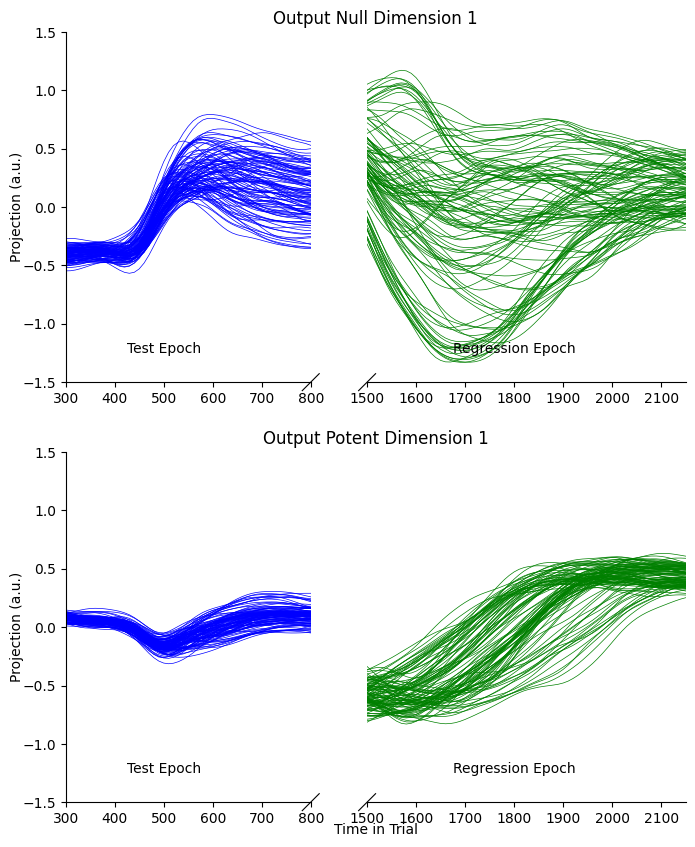

In [8]:
_,_,_,_,_,_ = pcar.fig_4(J_all_tensor, J_mus_stack, plot = True, basis = 0)

>>> best_lam returning: 162.3776739188721


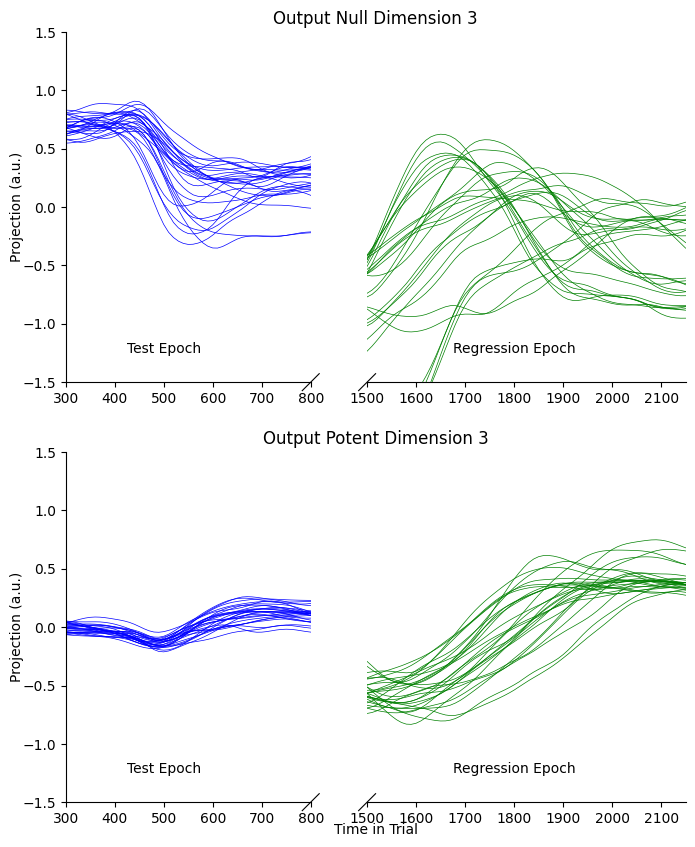

In [15]:
_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[:27,:,:], J_mus_tensor, plot = True, basis = 2)

>>> best_lam returning: 0.01


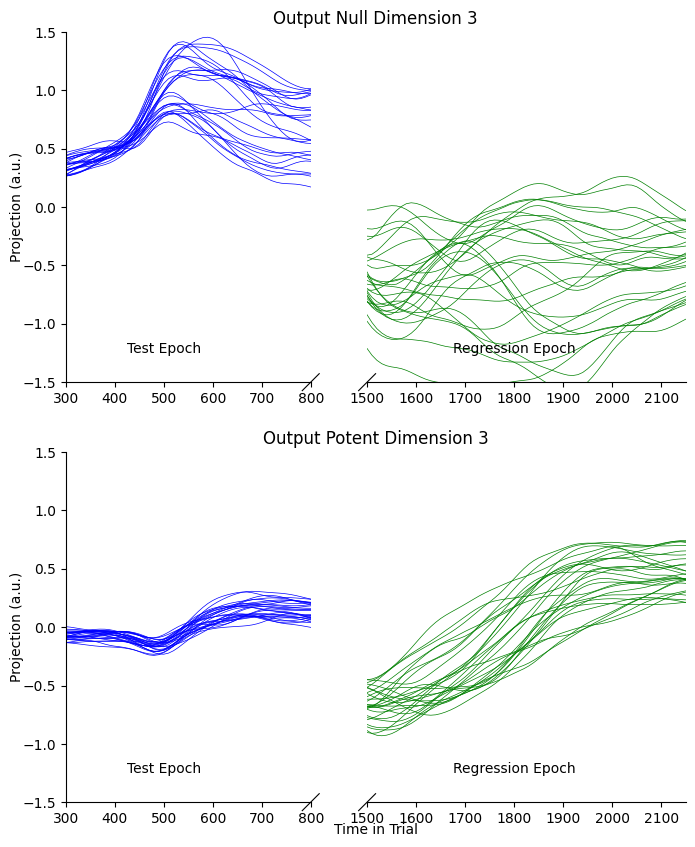

In [16]:
_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[27:54,:,:], J_mus_tensor, plot = True, basis = 2)

>>> best_lam returning: 297.63514416313194


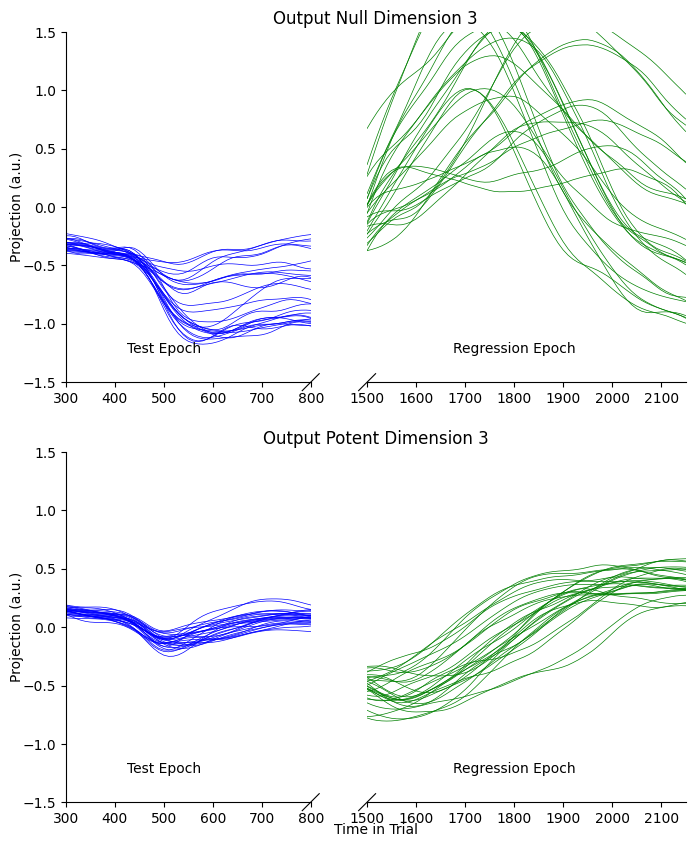

In [17]:
_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[54:81,:,:], J_mus_tensor, plot = True, basis = 2)

>>> best_lam returning: 88.58667904100822


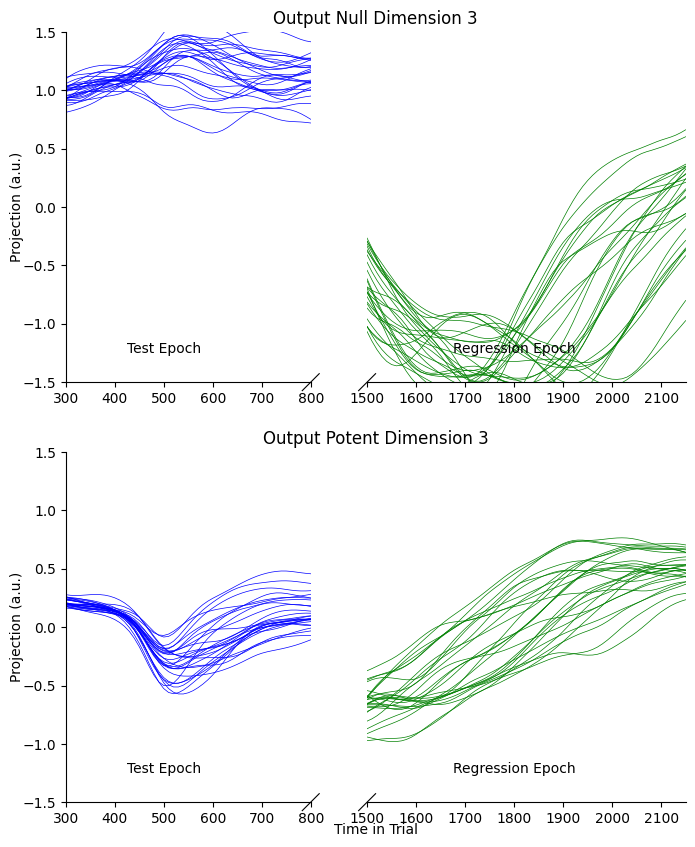

In [18]:
_,_,_,_,_,_ = pcar.fig_4(J_all_tensor[81:108,:,:], J_mus_tensor, plot = True, basis = 2)

>>> best_lam returning: 0.01


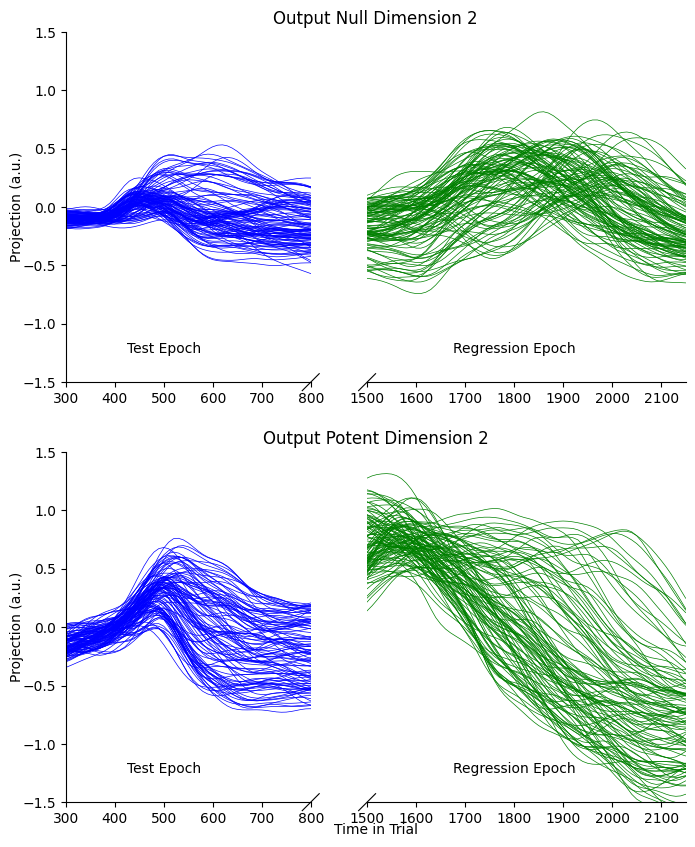

In [14]:
W, M_hat, M_hat_recon, R_squared, MSE, rank_N  = pcar.fig_4(J_PMd_tensor, J_M1_tensor, dimensions = 14, plot = True, basis = 1)

>>> best_lam returning: 0.01


ValueError: x and y must have same first dimension, but have shapes (67,) and (66,)

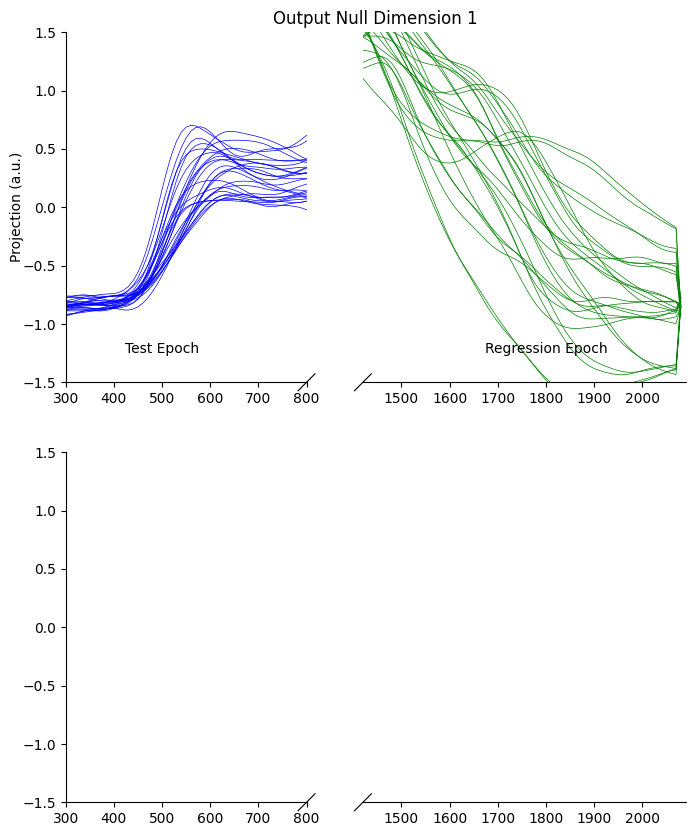

In [3]:

_,_,_,_,_,_ = pcar.fig_4(N_all_tensor, N_mus_tensor, plot = True, basis = 0)
